# Neural Network Layers Part 1 - Linear Layers

A fundamental concept in machine learning is 'linear regression'.  The concept is actually pretty intuitive, especially if we work in 2-D:

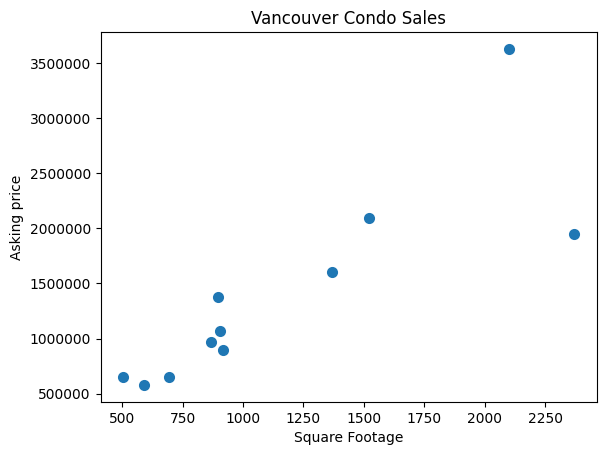

In [225]:
# some housing price data from Vancouver
import matplotlib.pyplot as plt
import pandas as pd

condo_data = pd.read_csv("../data/vancouver_condos.csv")

def draw_scatter():
    plt.scatter(condo_data["sq_footage"], condo_data["sale_price"], linewidth=2.0)
    plt.title("Vancouver Condo Sales")
    plt.xlabel("Square Footage")
    plt.ylabel("Asking price")
    plt.ticklabel_format(style="plain")
    plt.show()

draw_scatter()

That relationship looks pretty linear.  It would seem reasonable then for us to draw a line of best fit on the data, and use that to infer the price of a condo based on its square footage:

fit the data to a function: sale_price = 1246.51 (square_footage) + -37866.33


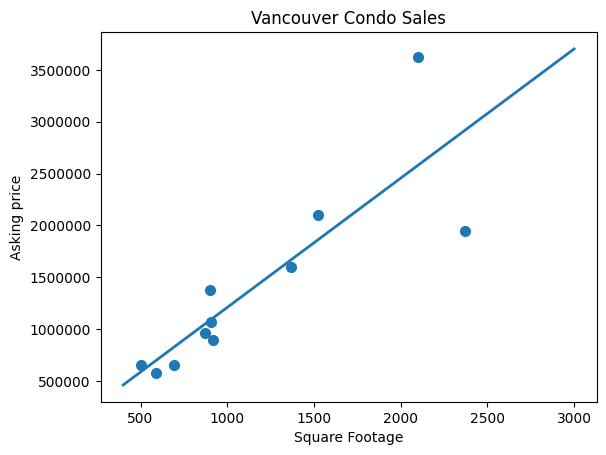

In [226]:
import numpy as np
m, b = np.polyfit(condo_data["sq_footage"], condo_data["sale_price"], 1)
# ie. we fit this to a line of slope 'm' and intercept b
print(f"fit the data to a function: sale_price = {round(m, 2)} (square_footage) + {round(b, 2)}")

def linear_predict(m, b, sq_footage: float) -> float:
    return m * sq_footage + b

plt.plot(
    [400, 3000],
    [linear_predict(m, b, 400), linear_predict(m, b, 3000)],
    linewidth=2,
    linestyle="-",
)
draw_scatter()

This is basically what's done when we fit a 'linear layer' from Pytorch to the same data:

In [227]:
import torch
import torch.nn
import torch.optim

class LinearRegressionModule(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModule, self).__init__()
        # one 'slope' feature, and one 'bias' feature
        self.linear_layer = torch.nn.Linear(in_features=1, out_features=1, bias=True)
        return

    def forward(self, x):
        return self.linear_layer(x)


model = LinearRegressionModule()
loss_fn = torch.nn.MSELoss()
learning_rate = 0.000001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [228]:
training_data = [
    (
        torch.tensor([row["sq_footage"]], dtype=torch.float32),
        torch.tensor([row["sale_price"]], dtype=torch.float32)
    ) for _, row in condo_data.iterrows()
]

In [229]:
for sq_footage, actual_sale_price in training_data:
    optimizer.zero_grad()
    predicted_price = model(sq_footage)
    loss = loss_fn(predicted_price, actual_sale_price)
    loss.backward()
    optimizer.step()


In [230]:
print(model.linear_layer.weight)
print(model.linear_layer.bias)

Parameter containing:
tensor([[855.0042]], requires_grad=True)
Parameter containing:
tensor([8.9205], requires_grad=True)


That is decently close, but let's iterate for a few more 'epochs' and see if we can improve the loss and get closer to the line of fit we achieved previously:

In [231]:
for _ in range(100):
    for sq_footage, actual_sale_price in training_data:
        optimizer.zero_grad()
        predicted_price = model(sq_footage)
        loss = loss_fn(predicted_price, actual_sale_price)
        loss.backward()
        optimizer.step()

fit the data to a function: sale_price = 2105.35 (square_footage) + -1282.66


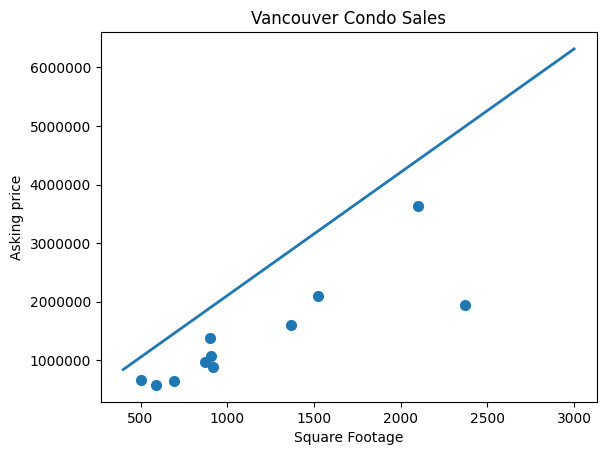

In [232]:
m = model.linear_layer.weight.item()
b = model.linear_layer.bias.item()
print(f"fit the data to a function: sale_price = {round(m, 2)} (square_footage) + {round(b, 2)}")
plt.plot(
    [400, 3000],
    [linear_predict(m, b, 400), linear_predict(m, b, 3000)],
    linewidth=2,
    linestyle="-",
)
draw_scatter()

So not great.  But hopefully the idea is clear - our 1 feature 'Linear Layer' is in theory equivalent to fitting data to a line through the data.

The issue is that using 'SGD' on so few data points is not likely to yield good results.  For literally linear relationships, we should stick to fitting a line to the data.

Where neural networks really shine is in 'learning' the parameters of relationships that are way more complicated than the one in this example.